In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Пути
metadata_file = '/data/metadata.csv'

# Загрузка
metadata = pd.read_csv(metadata_file)

# --- Первичный осмотр ---
print(metadata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               950 non-null    object 
 1   offset                  697 non-null    float64
 2   sex                     870 non-null    object 
 3   age                     713 non-null    float64
 4   finding                 950 non-null    object 
 5   RT_PCR_positive         593 non-null    object 
 6   survival                361 non-null    object 
 7   intubated               248 non-null    object 
 8   intubation_present      250 non-null    object 
 9   went_icu                397 non-null    object 
 10  in_icu                  335 non-null    object 
 11  needed_supplemental_O2  90 non-null     object 
 12  extubated               37 non-null     object 
 13  temperature             78 non-null     float64
 14  pO2_saturation          119 non-null    fl

In [7]:
metadata['finding'].unique()

array(['Pneumonia/Viral/COVID-19', 'Pneumonia', 'Pneumonia/Viral/SARS',
       'Pneumonia/Fungal/Pneumocystis',
       'Pneumonia/Bacterial/Streptococcus', 'No Finding',
       'Pneumonia/Bacterial/Chlamydophila', 'Pneumonia/Bacterial/E.Coli',
       'Pneumonia/Bacterial/Klebsiella', 'Pneumonia/Bacterial/Legionella',
       'Unknown', 'Pneumonia/Lipoid', 'Pneumonia/Viral/Varicella',
       'Pneumonia/Bacterial', 'Pneumonia/Bacterial/Mycoplasma',
       'Pneumonia/Viral/Influenza', 'todo', 'Tuberculosis',
       'Pneumonia/Viral/Influenza/H1N1', 'Pneumonia/Fungal/Aspergillosis',
       'Pneumonia/Viral/Herpes ', 'Pneumonia/Aspiration',
       'Pneumonia/Bacterial/Nocardia', 'Pneumonia/Viral/MERS-CoV',
       'Pneumonia/Bacterial/Staphylococcus/MRSA'], dtype=object)

In [8]:
print(metadata.head())

  patientid  offset sex   age                   finding RT_PCR_positive  \
0         2     0.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
1         2     3.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
2         2     5.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
3         2     6.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
4         4     0.0   F  52.0  Pneumonia/Viral/COVID-19               Y   

  survival intubated intubation_present went_icu  ...              date  \
0        Y         N                  N        N  ...  January 22, 2020   
1        Y         N                  N        N  ...  January 25, 2020   
2        Y         N                  N        N  ...  January 27, 2020   
3        Y         N                  N        N  ...  January 28, 2020   
4      NaN         N                  N        N  ...  January 25, 2020   

                                            location  folder  \
0        Cho Ray Hospital, Ho Chi 

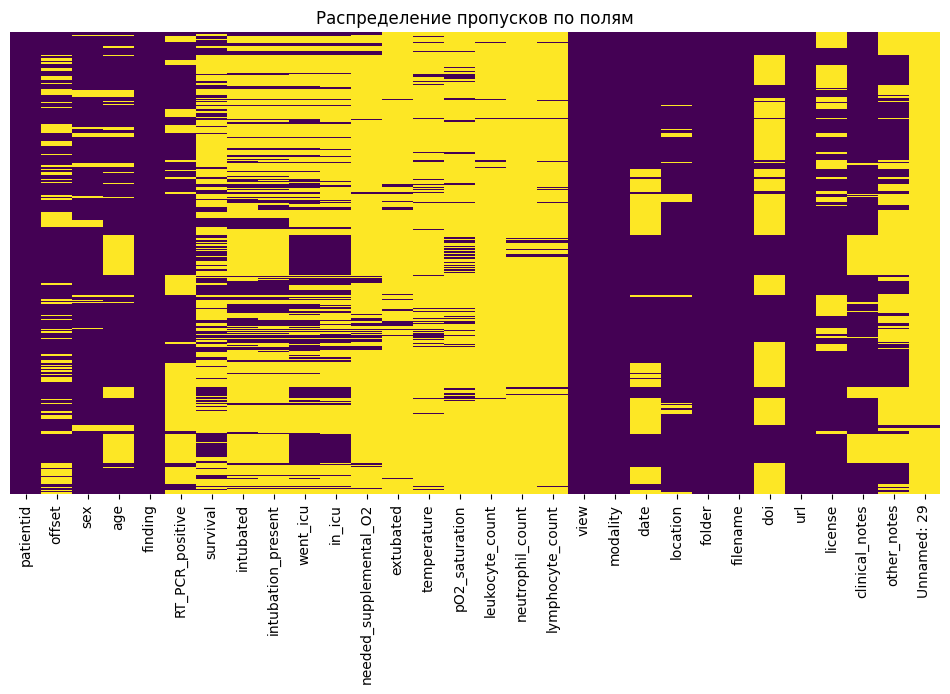

Пропуски по полям:
 patientid                   0
offset                    253
sex                        80
age                       237
finding                     0
RT_PCR_positive           357
survival                  589
intubated                 702
intubation_present        700
went_icu                  553
in_icu                    615
needed_supplemental_O2    860
extubated                 913
temperature               872
pO2_saturation            831
leukocyte_count           934
neutrophil_count          922
lymphocyte_count          910
view                        0
modality                    0
date                      289
location                   56
folder                      0
filename                    0
doi                       568
url                         0
license                   245
clinical_notes            182
other_notes               514
Unnamed: 29               945
dtype: int64


In [9]:
# --- Распределение пропусков ---
plt.figure(figsize=(12, 6))
sns.heatmap(metadata.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Распределение пропусков по полям')
plt.show()


missing_report = metadata.isnull().sum()
print("Пропуски по полям:\n", missing_report)


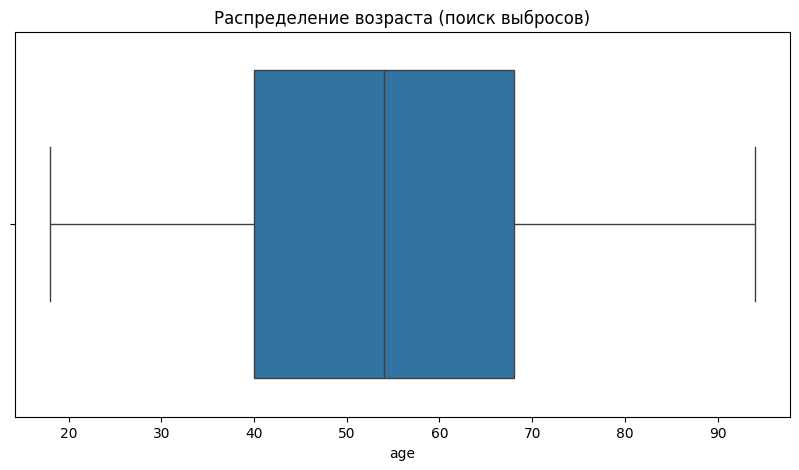

In [10]:
# --- Анализ возрастных значений ---
plt.figure(figsize=(10, 5))
sns.boxplot(x=metadata['age'])
plt.title('Распределение возраста (поиск выбросов)')
plt.show()

In [11]:
# --- Документирование ---
problems = {
    'missing_values': missing_report.to_dict(),
    'diagnosis_unique': metadata['finding'].unique().tolist(),
    'sex_unique': metadata['sex'].unique().tolist(),
    'age_uniuque': metadata['age'].unique().tolist()
}

print("Документирование проблем данных:\n", problems)

Документирование проблем данных:
 {'missing_values': {'patientid': 0, 'offset': 253, 'sex': 80, 'age': 237, 'finding': 0, 'RT_PCR_positive': 357, 'survival': 589, 'intubated': 702, 'intubation_present': 700, 'went_icu': 553, 'in_icu': 615, 'needed_supplemental_O2': 860, 'extubated': 913, 'temperature': 872, 'pO2_saturation': 831, 'leukocyte_count': 934, 'neutrophil_count': 922, 'lymphocyte_count': 910, 'view': 0, 'modality': 0, 'date': 289, 'location': 56, 'folder': 0, 'filename': 0, 'doi': 568, 'url': 0, 'license': 245, 'clinical_notes': 182, 'other_notes': 514, 'Unnamed: 29': 945}, 'diagnosis_unique': ['Pneumonia/Viral/COVID-19', 'Pneumonia', 'Pneumonia/Viral/SARS', 'Pneumonia/Fungal/Pneumocystis', 'Pneumonia/Bacterial/Streptococcus', 'No Finding', 'Pneumonia/Bacterial/Chlamydophila', 'Pneumonia/Bacterial/E.Coli', 'Pneumonia/Bacterial/Klebsiella', 'Pneumonia/Bacterial/Legionella', 'Unknown', 'Pneumonia/Lipoid', 'Pneumonia/Viral/Varicella', 'Pneumonia/Bacterial', 'Pneumonia/Bacterial/

Итог по проблемам

Во многих ключевых колонках (возраст, пол, клинические показатели) есть значительное количество пропусков — от нескольких сотен до почти тысячи записей.

Некоторые диагнозы содержат нерелевантные или временные значения, например todo и Unknown.

Пропуски распределены неравномерно.

In [12]:
df = metadata.copy()

In [13]:
# Считаем количество пропусков по столбцам
missing_counts = df.isna().sum()

# Фильтруем колонки, где пропусков <= 300
cols_to_keep = missing_counts[missing_counts <= 300].index

# Оставляем только эти колонки
df = df[cols_to_keep]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patientid       950 non-null    object 
 1   offset          697 non-null    float64
 2   sex             870 non-null    object 
 3   age             713 non-null    float64
 4   finding         950 non-null    object 
 5   view            950 non-null    object 
 6   modality        950 non-null    object 
 7   date            661 non-null    object 
 8   location        894 non-null    object 
 9   folder          950 non-null    object 
 10  filename        950 non-null    object 
 11  url             950 non-null    object 
 12  license         705 non-null    object 
 13  clinical_notes  768 non-null    object 
dtypes: float64(2), object(12)
memory usage: 104.0+ KB


In [15]:
# --- Очистка диагнозов ---
def unify_diagnosis(diag):
    if pd.isnull(diag):
        return 'Unknown'
    diag = diag.strip().lower()
    if 'covid' in diag:
        return 'COVID-19'
    elif 'tuberculosis' in diag:
        return 'Tuberculosis'
    elif 'pneumonia' in diag:
        return 'Pneumonia'
    elif 'no finding' in diag:
        return 'No Finding'
    else:
        return 'Unknown'


df['finding'] = df['finding'].apply(unify_diagnosis)

# --- Удаление дубликатов ---
df.drop_duplicates(inplace=True)

# Заполнение возраста значениями из диапазона 20-80 лет
num_missing = df['age'].isnull().sum()

# Генерируем случайные значения
random_ages = np.random.randint(20, 81, size=num_missing)

# Присваиваем их пропускам
df.loc[df['age'].isnull(), 'age'] = random_ages

# --- Пол ---
# Создаем маску пропусков
mask = df['sex'].isna()

# Генерируем случайные значения 'M' или 'F' для пропусков
random_sex = np.random.choice(['M', 'F'], size=mask.sum())

# Заполняем пропуски случайными значениями
df.loc[mask, 'sex'] = random_sex

df['license'] = df['license'].fillna('None')
df['date'] = df['date'].fillna('Unknown')


In [16]:
# --- Создание возрастных групп ---
def age_group(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 1:
        return 'Infant'
    elif age < 5:
        return 'Toddler'
    elif age < 12:
        return 'Child'
    elif age < 18:
        return 'Teen'
    elif age < 35:
        return 'Young Adult'
    elif age < 50:
        return 'Adult'
    elif age < 65:
        return 'Middle-aged'
    elif age < 80:
        return 'Senior'
    else:
        return 'Elderly'


df['age_group'] = df['age'].apply(age_group)

In [17]:
df.head()

,patientid,offset,sex,age,finding,view,modality,date,location,folder,filename,url,license,clinical_notes,age_group
0,2,0.0,M,65.0,COVID-19,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,https://www.nejm.org/doi/full/10.1056/NEJMc200...,None,"On January 22, 2020, a 65-year-old man with a ...",Senior
1,2,3.0,M,65.0,COVID-19,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,https://www.nejm.org/doi/full/10.1056/NEJMc200...,None,"On January 22, 2020, a 65-year-old man with a ...",Senior
2,2,5.0,M,65.0,COVID-19,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,https://www.nejm.org/doi/full/10.1056/NEJMc200...,None,"On January 22, 2020, a 65-year-old man with a ...",Senior
3,2,6.0,M,65.0,COVID-19,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,https://www.nejm.org/doi/full/10.1056/NEJMc200...,None,"On January 22, 2020, a 65-year-old man with a ...",Senior
4,4,0.0,F,52.0,COVID-19,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,https://www.nejm.org/doi/full/10.1056/NEJMc200...,None,diffuse infiltrates in the bilateral lower lungs,Middle-aged


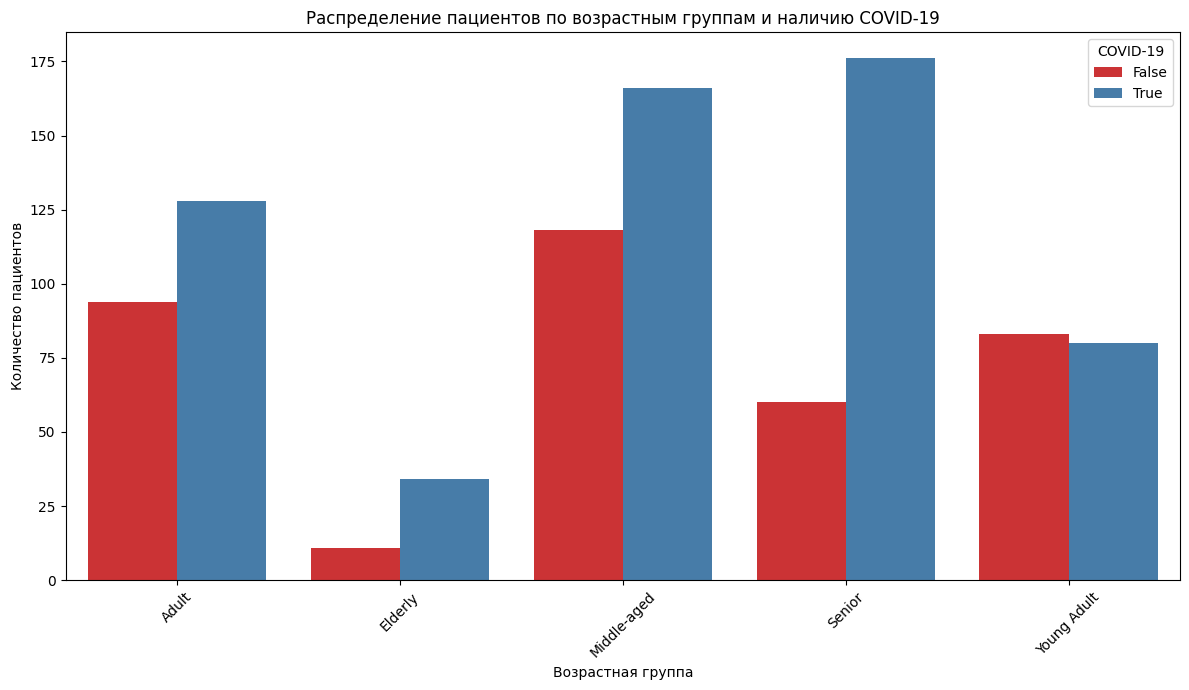

In [20]:
df['has_covid'] = df['finding'].str.contains('COVID-19', case=False, na=False)

# Считаем количество по возрастным группам и наличию COVID-19
age_finding_counts = df.groupby(['age_group', 'has_covid']).size().reset_index(name='count')

# Визуализация с разбивкой по наличию COVID-19
plt.figure(figsize=(12,7))
sns.barplot(data=age_finding_counts, x='age_group', y='count', hue='has_covid', palette='Set1')
plt.title('Распределение пациентов по возрастным группам и наличию COVID-19')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пациентов')
plt.xticks(rotation=45)
plt.legend(title='COVID-19')
plt.tight_layout()
plt.show()

Вывод: судя по графику, пациенты с COVID-19 в основном сосредоточены в возрастных группах "Young Adult" и "Adult", что может указывать на более высокую восприимчивость или диагностику в этих возрастах.

In [22]:
df.to_csv('../data/metadata_cleaned.csv', index=False)